# Project Objective

**Business Problem:**
- Customer churn is a critical issue for telecom companies, as acquiring new customers is often more costly than retaining existing ones. High churn rates can significantly impact the company's revenue and long-term growth.

**Goal:**

- Understand why customers are leaving by analyzing customer behavior and identifying the key factors contributing to churn. This analysis will help the telecom business focus on specific sectors or customer segments that are most at risk of canceling their service.

**Key Outcomes:**

- Insight Generation: Perform exploratory data analysis (EDA) to uncover trends, patterns, and correlations between customer demographics, service usage, and churn behavior. Identify actionable insights that can inform the business on where to focus efforts to reduce churn.

# Data Loading and Initial Inspection

In this section, I will load the dataset into a Pandas DataFrame for analysis. After loading the data, I will perform an initial inspection to identify any potential issues, such as missing or inconsistent values, that could affect future visualizations and analysis. Ensuring the data is clean and well-structured at this stage is crucial for obtaining reliable insights in the later stages of the project.

In [1]:
# pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
# importing dataset as data
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# verifying data info
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# check for null values in data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# check for duplicated values in data
print(data.duplicated().sum())

0


In [6]:
# gather more info about data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Preparation and Transformation
In this section, I will focus on preparing the data for analysis by performing the following steps:

- Drop non-essential columns that do not contribute to the analysis.
- Convert categorical columns to numerical values using OneHotEncoder. This transformation is necessary to facilitate the creation of a correlation matrix using numerical data.

Once the data is prepared, I will generate a heatmap correlation matrix to uncover relationships between features and identify potential drivers of customer churn. This will form the foundation for deeper analysis and insights.

In [7]:
# checking datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Drop Customer ID col because it isn't needed for our purposes
data = data.drop(['customerID'], axis=1)

In [9]:
# Convert Total Charges col values to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Checking for null values in Total Charges
print(data['TotalCharges'].isnull().sum())

11


In [10]:
# Repalce Total Charges null values with median of Total Charges
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Verify null values in Total Charges after change
print(data['TotalCharges'].isnull().sum())

0


In [11]:
# Outline categorical cols for the purpose of changing object data types to numerical data types
from sklearn.preprocessing import OneHotEncoder 

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [12]:
# Convert all categorical columns to binary values (0s and 1s) using OneHotEncoder from sklearn
churn_data = OneHotEncoder(drop='first', handle_unknown ='ignore', sparse_output = False).set_output(transform='pandas')

churn_data_transform = churn_data.fit_transform(data[categorical_cols])

# Outline numerical cols and then concatinating them to newly created cols from OneHotEncoder
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

new_churn_data = pd.concat([data[numerical_cols].reset_index(drop=True), churn_data_transform.reset_index(drop=True)], axis=1)

new_churn_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


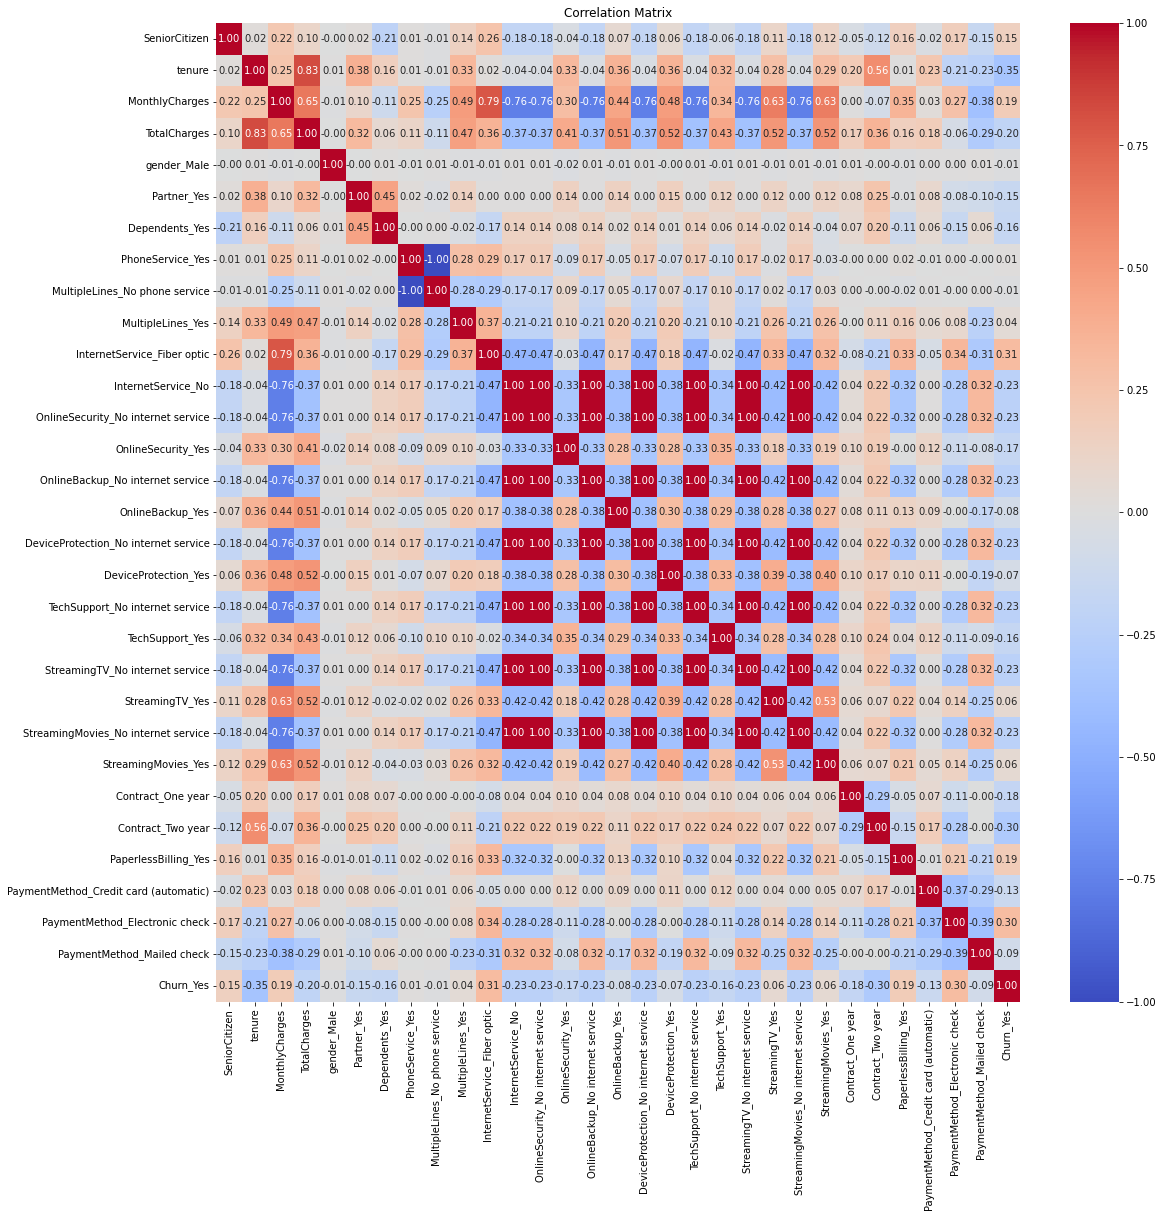

In [13]:
# Visualize new_churn_data as a correlation matrix for the purpose identifying the impact of different cols on customer churn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 18))
sns.heatmap(new_churn_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Forming Conclusions and Strengthening Insights with Further Visualization

## Key Observations from the Heatmap:
In this analysis, **`Churn_Yes`** represents customers who decided to discontinue their telecom service.

## Notable Correlations with `Churn_Yes`:
### Negative Correlations (Blue Shades):
- **Tenure**: A strong negative correlation of **-0.35** indicates that the longer a customer has been with the company, the less likely they are to churn. This is a common trend in churn analysis, as long-term customers tend to be more loyal.
  
- **Contract (One Year and Two Year)**: Contracts of **one year (-0.18)** and **two years (-0.30)** show significant negative correlations with churn. Customers on longer-term contracts are less likely to churn compared to those on month-to-month contracts, likely due to the security and commitment of longer agreements.

- **No Internet Service**: There’s a negative correlation of **-0.23** for customers who do not subscribe to internet services. This suggests that customers who rely solely on phone services may be less likely to churn than those who subscribe to internet services.

### Positive Correlations (Red/Orange Shades):
- **Monthly Charges**: A positive correlation of **0.19** shows that customers with higher monthly charges are more likely to churn. High costs could be a driving factor behind customer dissatisfaction and their decision to leave.
  
- **Paperless Billing**: Customers opting for **paperless billing** exhibit a positive correlation of **0.19** with churn, suggesting that these customers might be more tech-savvy or price-sensitive and thus more prone to leaving.

- **Payment Method (Electronic Check)**: There’s a positive correlation of **0.30**, indicating that customers who pay via electronic check are more likely to churn compared to those using other payment methods like credit cards or bank transfers.

- **Fiber Optic Internet**: The **0.31** positive correlation suggests that customers who use **fiber optic internet** are more likely to churn compared to those using DSL or phone services, highlighting a potential issue with this particular service.

---

## Conclusions:
- **Longer Tenure = Lower Churn**: Customers who have been with the company for a longer period are more loyal. Encouraging retention through loyalty programs or contract incentives could help reduce churn.
  
- **Long-Term Contracts Reduce Churn**: Customers on 1-year or 2-year contracts are far less likely to churn than those on month-to-month plans, suggesting that longer contracts help maintain customer loyalty.

- **No Internet Service = Lower Churn**: Customers who do not subscribe to internet services (opting for phone-only services) tend to churn less, possibly because they are satisfied with their basic service needs being met.

- **High Monthly Charges Lead to Churn**: Customers with higher monthly charges are more likely to leave, indicating that affordability may be a concern for this segment.

- **Electronic Check Payments = Higher Churn**: Customers using electronic checks show a higher churn rate, which could signal dissatisfaction or frustration with the payment method. Exploring incentives for switching to more seamless, automated payment methods may help retain these customers.

- **Tech-Savvy Customers May Be More Price-Sensitive**: The positive correlation between **PaperlessBilling** and churn suggests that tech-savvy customers might be more likely to churn, possibly due to higher price sensitivity or dissatisfaction with the service.

- **Fiber Optic Customers Could Be More Demanding**: The positive correlation with churn among **Fiber Optic Internet** users suggests that these customers might have higher service expectations or experience more dissatisfaction. Fiber optic users may expect superior service in terms of speed and reliability, and when those expectations are not met, they may be more inclined to churn.

---

## Actionable Steps Based on Heatmap Findings:

### 1. Target High-Churn Segments:
- Customers with high monthly charges and those using electronic checks are at a higher risk of churning. Offering targeted discounts or switching incentives could help retain these customers.

### 2. Encourage Longer Contracts:
- Customers on month-to-month contracts exhibit a higher churn rate. Implementing incentives to encourage these customers to switch to longer-term contracts (such as discounts or added benefits) could improve retention.

### 3. Investigate Fiber Optic Internet Service:
- The high churn rate associated with fiber optic internet customers warrants further investigation. Gathering customer feedback and addressing potential issues with this service could lead to improvements in satisfaction and retention.

### 4. Improve the Customer Experience for High-Tech Segments:
- **Fiber Optic** users and **Paperless Billing** customers may represent a more tech-savvy segment that demands a higher level of service. Improving service quality and offering personalized plans or exclusive deals for these customers may reduce churn.

### 5. Analyze Customer Satisfaction for High-Churn Payment Methods:
- Conduct surveys or gather feedback from customers using **Electronic Check** to understand their challenges and encourage them to switch to more seamless payment methods, such as credit cards or direct debit, by offering incentives like discounts or cashback rewards.

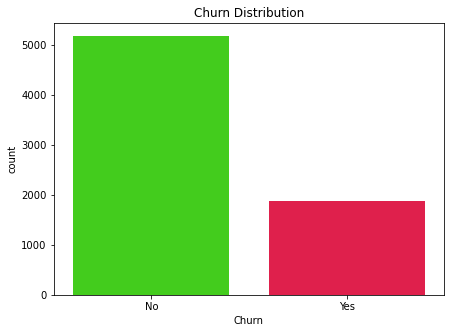

In [14]:
# Visualize churn distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=data, palette='prism')
plt.title('Churn Distribution')
plt.show()

##
# Further Examination of Negative Correlation Observations:

## Longer Tenure = Lower Churn:

This graph illustrates the relationship between **tenure** (how long a customer has been with the company) and **churn**. The histogram shows that customers with longer tenure are less likely to churn, as evidenced by the lower churn rates for customers who have been with the company for a longer period. This supports the negative correlation of -0.35 identified in the heatmap, indicating that customer loyalty tends to increase with tenure. Offering loyalty programs or contract renewals to long-tenure customers may help further reduce churn.


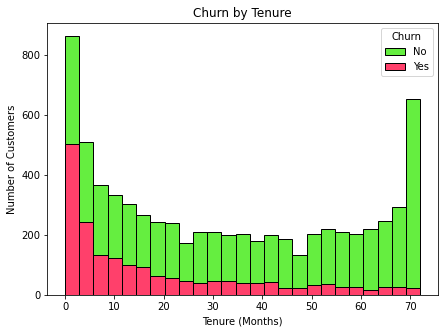

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=25, palette='prism')
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

## 
## Contract Type and Churn:

This count plot compares **contract types** (Month-to-Month, One Year, and Two Year) with churn. Customers on **month-to-month contracts** are shown to have a higher likelihood of churning compared to those on longer-term contracts (One Year and Two Year), which is consistent with the negative correlations observed (-0.18 and -0.30, respectively). Long-term contracts tend to provide stability and retention, suggesting that encouraging customers to switch to longer contracts could lower churn rates.


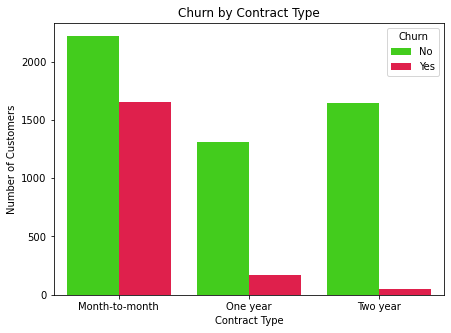

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Contract', hue='Churn', data=data, palette='prism')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

## 
## No Internet Service and Churn

This series of three plots examines the relationship between churn and various service features that customers may or may not subscribe to, such as **Online Security**, **Device Protection**, and **Online Backup**. Customers who do not subscribe to these services show lower churn rates, particularly those without internet services. The negative correlation of -0.23 for customers who only utilize phone services suggests that these customers may be more loyal, likely because their service needs are being met at a lower cost. Encouraging customers with higher service tiers to stay might require more personalized service or incentive offers.

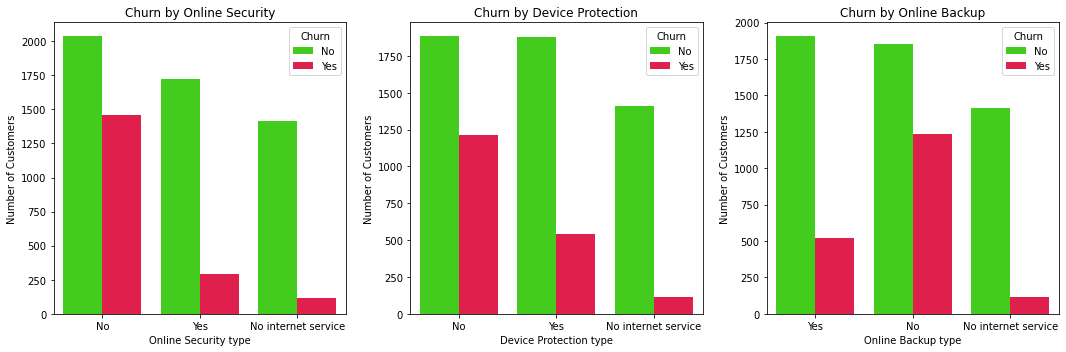

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(x='OnlineSecurity', hue='Churn', data=data, ax=axes[0], palette='prism')
axes[0].set_title('Churn by Online Security')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlabel('Online Security type')

sns.countplot(x='DeviceProtection', hue='Churn', data=data, ax=axes[1], palette='prism')
axes[1].set_title('Churn by Device Protection')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Device Protection type')

sns.countplot(x='OnlineBackup', hue='Churn', data=data, ax=axes[2], palette='prism')
axes[2].set_title('Churn by Online Backup')
axes[2].set_ylabel('Number of Customers')
axes[2].set_xlabel('Online Backup type')

plt.tight_layout()
plt.show()

# Positive Corellation Observations:

## Monthly Charges and Churn

This histogram illustrates how **Monthly Charges** impact churn rates. As expected, customers with **higher monthly charges** tend to have a higher likelihood of churning. This aligns with the positive correlation of 0.19, indicating that affordability may be a key issue for high-paying customers. Implementing pricing strategies, such as offering discounts or value-added services to customers with higher bills, could help reduce churn in this segment.


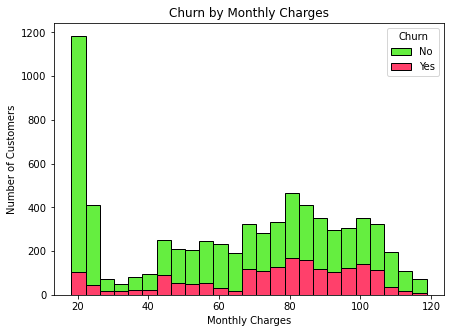

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', bins=25, palette='prism')
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

##
## Paperless Billing and Payment Method vs. Churn

The first plot examines the relationship between **Paperless Billing** and churn, showing that customers who opt for paperless billing are more likely to churn. This could suggest that tech-savvy customers, who tend to use paperless billing, are more price-sensitive or open to switching providers. The second plot focuses on **Payment Methods**, showing that customers who use **Electronic Check** as their payment method exhibit higher churn rates compared to those using other methods like credit cards or bank transfers. Offering incentives to switch to automated payments or improving the electronic check process could help retain these customers.

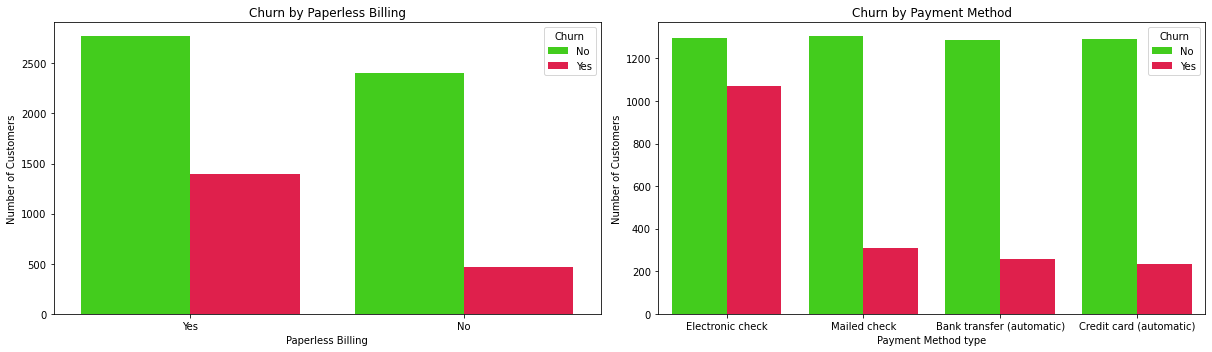

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

sns.countplot(x='PaperlessBilling', hue='Churn', data=data, ax=axes[0], palette='prism')
axes[0].set_title('Churn by Paperless Billing')
axes[0].set_xlabel('Paperless Billing')
axes[0].set_ylabel('Number of Customers')

sns.countplot(x='PaymentMethod', hue='Churn', data=data, ax=axes[1], palette='prism')
axes[1].set_title('Churn by Payment Method')
axes[1].set_xlabel('Payment Method type')
axes[1].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

##
## Internet Service and Churn

This count plot visualizes the relationship between **Internet Service types** (DSL, Fiber Optic, and No Internet Service) and churn. Customers who subscribe to **Fiber Optic Internet** show higher churn rates compared to those with DSL or no internet service, consistent with the positive correlation of 0.31. This may suggest that fiber optic customers have higher expectations for service quality, speed, and reliability. Telecom companies could benefit from improving fiber optic service offerings or addressing customer feedback to reduce churn in this segment.

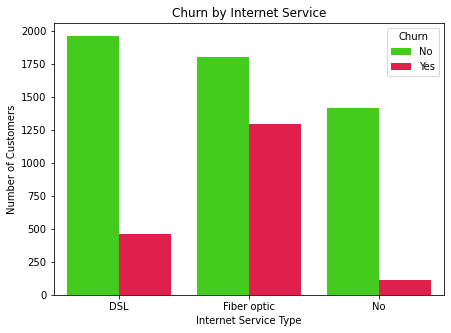

In [20]:
plt.figure(figsize=(7, 5))
sns.countplot(x='InternetService', hue='Churn', data=data, palette='prism')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

## Final Conclusions and Thoughts

### Recap of the Project:
In this project, I conducted an in-depth **Exploratory Data Analysis (EDA)** on customer churn data from a telecom company to uncover the key factors contributing to churn. The analysis was focused on identifying patterns and correlations between various customer characteristics and service usage to help the business understand why customers leave and what actions can be taken to improve retention.

The project involved several key steps:
1. **Data Cleaning and Preparation**: I processed the dataset by converting categorical variables to numerical ones and handling missing values to ensure that the data was suitable for analysis.
2. **Correlation Analysis**: I created a heatmap to visualize the relationships between various features and customer churn, identifying both positive and negative correlations.
3. **Visualization of Key Insights**: I used various visualizations (e.g., histograms, count plots) to further explore the key correlations and better understand how customer behaviors and service features affect churn rates.

### Actionable Recommendations:
Based on the insights derived from the analysis, several **actionable steps** were identified for the telecom company to reduce customer churn:

1. **Target High-Churn Segments**:
   - **Customers with high monthly charges** are more likely to churn. Offering **discounts**, **value-added services**, or personalized **retention campaigns** could help keep these customers from leaving.
   - **Customers using electronic checks** as their payment method also show higher churn rates. Encouraging them to switch to more reliable payment methods, such as credit cards or direct debit, could reduce churn in this segment.

2. **Encourage Longer-Term Contracts**:
   - Customers on **month-to-month contracts** are more likely to churn compared to those on 1-year or 2-year contracts. Providing **incentives** for customers to switch to longer-term contracts (e.g., loyalty rewards or lower monthly fees) can improve customer retention.

3. **Focus on Improving Fiber Optic Internet Service**:
   - Customers with **fiber optic internet** show higher churn rates compared to those with DSL or no internet service. This may indicate that fiber optic customers have higher expectations for speed and service quality. **Gathering customer feedback** and focusing on improving the reliability and satisfaction of fiber optic services could lower churn in this high-tech customer segment.

4. **Loyalty Programs for Long-Tenure Customers**:
   - **Customers with longer tenure** are less likely to churn. Offering **loyalty programs** or exclusive deals for long-term customers may further solidify their commitment to the company and reduce churn rates.

5. **Address the Needs of Tech-Savvy Customers**:
   - **Tech-savvy customers**, who are more likely to opt for **paperless billing**, show a higher probability to churn. Tailored offers, such as **bundled services** or **special promotions**, could increase loyalty among this group, which may be more price-sensitive and open to competitor offers.

### Project Highlights:
Throughout the project, several important trends were uncovered:
- Tenure and contract length emerged as strong indicators of customer loyalty, with longer-tenured and long-term contract customers being less likely to churn.
- Higher monthly charges and fiber optic internet users are more prone to leaving, indicating potential dissatisfaction with price and service quality.
- This project successfully translated these insights into clear, actionable recommendations that the telecom company can implement to improve customer retention.

### Future Improvements:
If I were to do this project again, I would expand it by incorporating **machine learning** to predict churn. This would allow the company to proactively identify customers at high risk of churning and take preventative action. Using models like **logistic regression**, **random forests**, or **XGBoost**, I could build a predictive model based on the customer data. The inclusion of predictive modeling would make the project more comprehensive by enabling:
- **Churn Prediction**: Using customer data to predict whether a customer is likely to churn, allowing the company to focus retention efforts on high-risk customers.
- **Feature Importance Analysis**: Identifying which customer features (e.g., contract type, payment method, monthly charges) contribute the most to churn prediction, enabling targeted interventions.
- **Customer Segmentation**: Grouping customers based on their likelihood to churn and tailoring retention strategies to specific segments.

### Conclusion:
This project provided valuable insights into the factors influencing customer churn in the telecom industry, and the analysis has resulted in actionable steps the company can take to improve customer retention. By incorporating **machine learning** and predictive analytics in the future, the project can be taken to the next level, offering even greater value by allowing the company to proactively manage churn risk. Overall, this analysis serves as a foundation for more advanced strategies aimed at reducing churn and improving customer satisfaction.